Шаг выборки x:  0.030303030303030304

выборка иксов: [1.         1.03030303 1.06060606 1.09090909 1.12121212 1.15151515
 1.18181818 1.21212121 1.24242424 1.27272727 1.3030303  1.33333333
 1.36363636 1.39393939 1.42424242 1.45454545 1.48484848 1.51515152
 1.54545455 1.57575758 1.60606061 1.63636364 1.66666667 1.6969697
 1.72727273 1.75757576 1.78787879 1.81818182 1.84848485 1.87878788
 1.90909091 1.93939394 1.96969697 2.         2.03030303 2.06060606
 2.09090909 2.12121212 2.15151515 2.18181818 2.21212121 2.24242424
 2.27272727 2.3030303  2.33333333 2.36363636 2.39393939 2.42424242
 2.45454545 2.48484848 2.51515152 2.54545455 2.57575758 2.60606061
 2.63636364 2.66666667 2.6969697  2.72727273 2.75757576 2.78787879
 2.81818182 2.84848485 2.87878788 2.90909091 2.93939394 2.96969697
 3.         3.03030303 3.06060606 3.09090909 3.12121212 3.15151515
 3.18181818 3.21212121 3.24242424 3.27272727 3.3030303  3.33333333
 3.36363636 3.39393939 3.42424242 3.45454545 3.48484848 3.51515152
 3.5454545

<ipython-input-7-2b3d6e340247>:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_1_sigma[i] = y_est[i] - (math.sqrt(sigma_squared * d[i]) * Un)
<ipython-input-7-2b3d6e340247>:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_2_sigma[i] = y_est[i] + (math.sqrt(sigma_squared * d[i]) * Un)


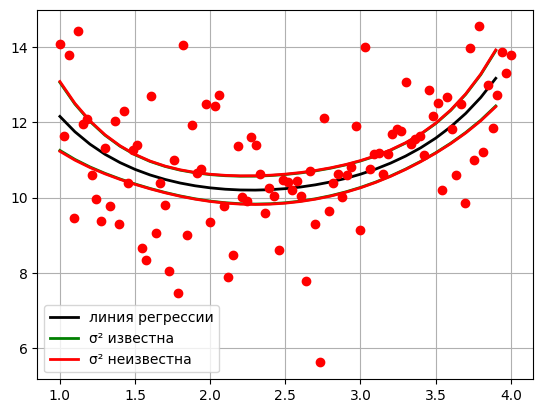

In [ ]:
import numpy as np
import math
import scipy.stats as sps
import matplotlib.pyplot as plt
import pylab
from numpy import random


class Function:
    def __init__(self, x):
        self.x = x

    def f(self, i):
        if i == 0:
            return 1
        if i == 1:
            return 1/self.x # Если i равен 1, метод возвращает 1/x
        else:
            return 1/(5-self.x) #в противном случае он возвращает само x.

sigma_squared = float(2) #дисперсия

x_left = 1
x_right = 4
n = 100 #объём выборки
h = (x_right - x_left) / (n - 1) #шаг выборки
print('Шаг выборки x: ',h)

x = np.zeros(n)
for i in range(len(x)):
    x[i] = x_left + h*i
print('\nвыборка иксов:', x)


beta_use = np.array([5, 6, 7]) # вектор констант бэта
X = np.zeros((len(x), len(beta_use)))

for i in range(np.shape(X)[1]):#по индексам столбцов матрицы
    for j in range(np.shape(X)[0]):#по индексам строк матрицы
        func = Function(x[j])
        X[j,i] = func.f(i)#строит матрицу X из функциий
print('матрица:\n', X)
epsilon = np.random.normal(0, math.sqrt(sigma_squared), len(x))#генерирует массив epsilon, содержащий случайные числа, сгенерированные из нормального распределения.
print('\nвектор эпсилон:\n', epsilon)
multiply = np.dot(X, beta_use)
print('произведение X на бета:\n', multiply)
eta = np.zeros(len(x))
for i in range(len(eta)):
    eta[i] = multiply[i] + epsilon[i]

print('вектор эта:\n', eta)
X_trans = X.transpose()#транспонирование матрицы
A = np.dot(X_trans, X)
print('Матрица А:\n', A)

A_inverse = np.linalg.inv(A)
print('Матрица обратная матрице А:\n', A_inverse)
beta = np.dot(X_trans, eta)
beta = np.dot(A_inverse, beta) #нахождение вектора оценок
print('вектор оценок бета:\n', beta)

beta1 = beta[0]
print('оценка коэффициента бета1:\n', beta1)
beta2 = beta[1]
print('оценка коэффициента бета2:\n', beta2)
beta3 = beta[2]
print('оценка коэффициента бета3:\n', beta3)
Variance = sigma_squared * A_inverse
print('Ковариационная мтарица:\n', Variance)

alpha = 0.06
dist_criteria = 1 - (alpha/2) #критерий распределения
Un = sps.norm.ppf([dist_criteria], 0, 1) #квантиль стандартного нормального распределения для заданного уровня значимости
print('критерий Гауса', Un)

#Доверительные интервалы, когда знаем сигму
beta1_1_sigma = beta1 - Un * (1 / (math.sqrt(Variance[0,0])))
beta1_2_sigma = beta1 + Un * (1 / (math.sqrt(Variance[0,0])))
print('доверительный интервал бета1:\n', '(',beta1_1_sigma,', ', beta1_2_sigma, ')')

beta2_1_sigma = beta2 - Un * (1 / (math.sqrt(Variance[1,1])))
beta2_2_sigma = beta2 + Un * (1 / (math.sqrt(Variance[1,1])))
print('доверительный интервал бета2:\n', '(',beta2_1_sigma,', ', beta2_2_sigma, ')')

beta3_1_sigma = beta3 - Un * (1 / (math.sqrt(Variance[2,2])))
beta3_2_sigma = beta3 + Un * (1 / (math.sqrt(Variance[2,2])))
print('доверительный интервал бета3:\n', '(',beta3_1_sigma,', ', beta3_2_sigma, ')')


t = sps.t.ppf(dist_criteria, n - 3)#квантиль распределения Стьюдента
print('критерий Стьюдента', t)
eta_est = np.dot(X, beta) #оценка вектора эта
print('оценка вектора эта:', eta_est)
sum_square = 0
for i in range (0, n):#расчёт остаточной дисперсии
    sum_square += ((eta[i] - eta_est[i]) ** 2)#сумме квадратов остатков
s_squared = (1 / (n - 3)) * sum_square #остаточная дисперсия-оценка дисперсии ошибок регрессии
print('остаточная дисперсия:', s_squared)
#Доверительные интервалы, когда не знаем сигму
beta1_1 = beta1 - t * (1 / (math.sqrt(Variance[0,0])))
beta1_2 = beta1 + t * (1 / (math.sqrt(Variance[0,0])))
print('доверительный интервал бета1:\n', '(',beta1_1,', ', beta1_2, ')')

beta2_1 = beta2 - t * (1 / (math.sqrt(Variance[1,1])))
beta2_2 = beta2 + t * (1 / (math.sqrt(Variance[1,1])))
print('доверительный интервал бета2:\n', '(',beta2_1,', ', beta2_2, ')')

beta3_1 = beta3 - t * (1 / (math.sqrt(Variance[2,2])))
beta3_2 = beta3 + t * (1 / (math.sqrt(Variance[2,2])))
print('доверительный интервал бета3:\n', '(',beta3_1,', ', beta3_2, ')')

# точки для построения линии регрессии
x_1 = np.arange(x_left, x_right, 0.1)

y_est = np.zeros(len(x_1))
for i in range(len(x_1)):#проходится по всем x
    func_1 = Function(x_1[i]) #Создается объект Function для текущего значения x_1[i].
    y_est[i] = beta1 * func_1.f(0) + beta2 * func_1.f(1) + beta3 * func_1.f(2)#оценки значений зависимой переменной
plt.plot(x_1, y_est, linewidth = 2, color = 'black', label = 'линия регрессии')
plt.grid(True)
d = np.zeros(len(x_1))
for i in range(len(d)):
    func_1 = Function(x_1[i])
    d[i] = (func_1.f(0) * func_1.f(0) * A_inverse[0,0]) + (func_1.f(1) * func_1.f(1) * A_inverse[1,1]) + (func_1.f(2) * func_1.f(2) * A_inverse[2,2]) + (2 * func_1.f(0) * func_1.f(1) * A_inverse[0,1]) + (2 * func_1.f(1) * func_1.f(2) * A_inverse[1,2]) + (2 * func_1.f(0) * func_1.f(2) * A_inverse[0,2])

#Доверительные интервалы линии регрессии, когда сигма известна
y_1_sigma = np.zeros(len(x_1))
for i in range (len(x_1)):
    y_1_sigma[i] = y_est[i] - (math.sqrt(sigma_squared * d[i]) * Un)
plt.plot(x_1, y_1_sigma, linewidth = 2, color = 'g', label = 'σ² известна')

y_2_sigma = np.zeros(len(x_1))
for i in range (len(x_1)):
    y_2_sigma[i] = y_est[i] + (math.sqrt(sigma_squared * d[i]) * Un)
plt.plot(x_1, y_2_sigma, linewidth = 2, color = 'g')

#Доверительные интервалы линии регрессии, когда сигма неизвестна
y_1 = np.zeros(len(x_1))
for i in range (len(x_1)):
    y_1[i] = y_est[i] - (math.sqrt(s_squared * d[i]) * t)
plt.plot(x_1, y_1, linewidth = 2, color = 'r', label = 'σ² неизвестна')
y_2 = np.zeros(len(x_1))
for i in range (len(x_1)):
    y_2[i] = y_est[i] + (math.sqrt(s_squared * d[i]) * t)
plt.plot(x_1, y_2, linewidth = 2, color = 'r')


multiply = np.dot(X, beta_use)
print('\nпроизведение X на бета', multiply)

eta = np.zeros(len(x))
for i in range(len(eta)):
    eta[i] = multiply[i] + epsilon[i]
print('\nвектор эта', eta)

plt.plot(x, eta, 'ro')

plt.legend()
plt.show()
#


<ipython-input-8-0e0954105339>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_1_sigma[i] = y_est[i] - (math.sqrt(sigma_squared * d[i]) * Un)
<ipython-input-8-0e0954105339>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_2_sigma[i] = y_est[i] + (math.sqrt(sigma_squared * d[i]) * Un)


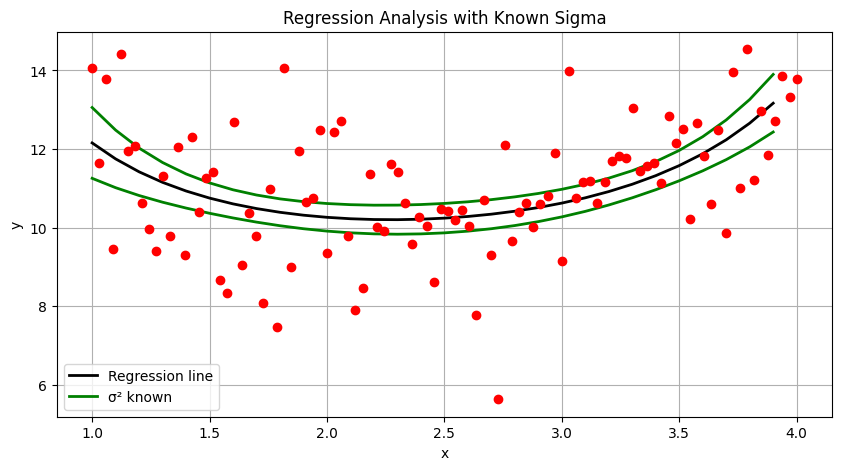

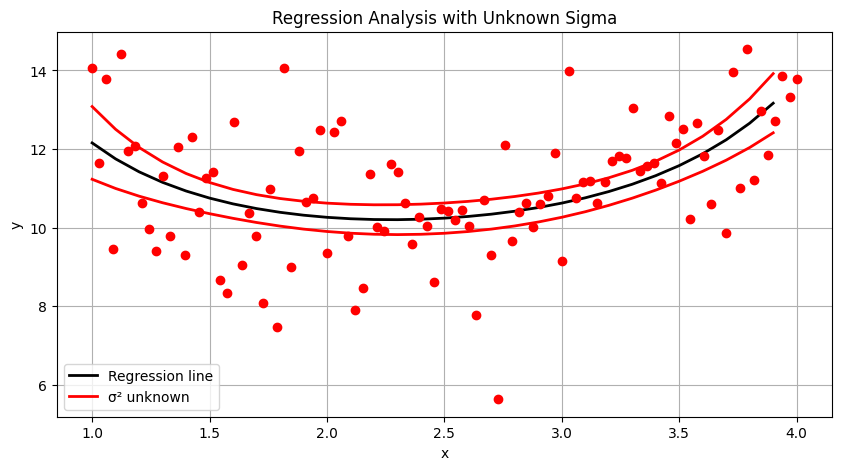

In [ ]:
# First plot for case where sigma is known
plt.figure(figsize=(10, 5))

# Plotting regression line
plt.plot(x_1, y_est, linewidth=2, color='black', label='Regression line')
plt.grid(True)

# Confidence intervals of regression line when sigma is known
y_1_sigma = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_1_sigma[i] = y_est[i] - (math.sqrt(sigma_squared * d[i]) * Un)
plt.plot(x_1, y_1_sigma, linewidth=2, color='g', label='σ² known')

y_2_sigma = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_2_sigma[i] = y_est[i] + (math.sqrt(sigma_squared * d[i]) * Un)
plt.plot(x_1, y_2_sigma, linewidth=2, color='g')

# Plotting the data points
plt.plot(x, eta, 'ro')

plt.legend()
plt.title("Regression Analysis with Known Sigma")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Second plot for case where sigma is unknown
plt.figure(figsize=(10, 5))

# Plotting regression line
plt.plot(x_1, y_est, linewidth=2, color='black', label='Regression line')
plt.grid(True)

# Confidence intervals of regression line when sigma is unknown
y_1 = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_1[i] = y_est[i] - (math.sqrt(s_squared * d[i]) * t)
plt.plot(x_1, y_1, linewidth=2, color='r', label='σ² unknown')

y_2 = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_2[i] = y_est[i] + (math.sqrt(s_squared * d[i]) * t)
plt.plot(x_1, y_2, linewidth=2, color='r')

# Plotting the data points
plt.plot(x, eta, 'ro')

plt.legend()
plt.title("Regression Analysis with Unknown Sigma")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<ipython-input-21-f11a77504767>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_1_sigma[i] = y_est[i] - (math.sqrt(sigma_squared * d[i]) * Un)
<ipython-input-21-f11a77504767>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_2_sigma[i] = y_est[i] + (math.sqrt(sigma_squared * d[i]) * Un)


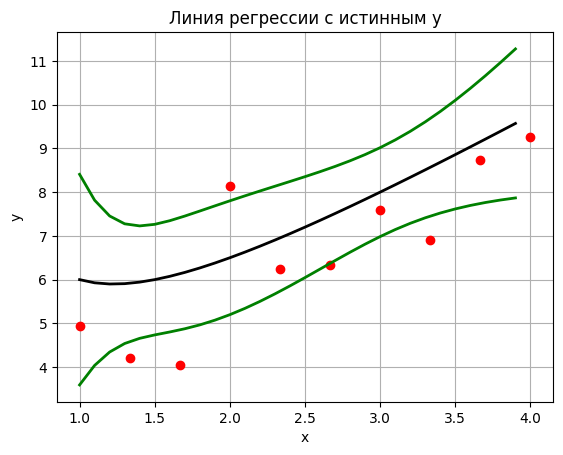

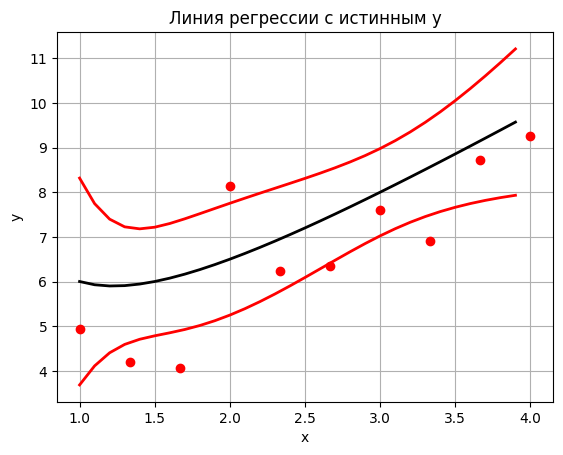

In [ ]:
# Точки для построения линии регрессии
x_1 = np.arange(x_left, x_right, 0.1)

y_est = np.zeros(len(x_1))
for i in range(len(x_1)):
    func_1 = Function(x_1[i])
    y_est[i] = beta[0] * func_1.f(0) + beta[1] * func_1.f(1) + beta[2] * func_1.f(2)

plt.plot(x_1, y_est, linewidth=2, color='black')
plt.plot(x, eta, 'ro')

# Confidence intervals of regression line when sigma is known
y_1_sigma = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_1_sigma[i] = y_est[i] - (math.sqrt(sigma_squared * d[i]) * Un)
plt.plot(x_1, y_1_sigma, linewidth=2, color='g', label='σ² known')

y_2_sigma = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_2_sigma[i] = y_est[i] + (math.sqrt(sigma_squared * d[i]) * Un)
plt.plot(x_1, y_2_sigma, linewidth=2, color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линия регрессии с истинным y')
plt.grid(True)
plt.show()

# Точки для построения линии регрессии
x_1 = np.arange(x_left, x_right, 0.1)

y_est = np.zeros(len(x_1))
for i in range(len(x_1)):
    func_1 = Function(x_1[i])
    y_est[i] = beta[0] * func_1.f(0) + beta[1] * func_1.f(1) + beta[2] * func_1.f(2)

plt.plot(x_1, y_est, linewidth=2, color='black')
plt.plot(x, eta, 'ro')
# Confidence intervals of regression line when sigma is unknown
y_1 = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_1[i] = y_est[i] - (math.sqrt(s_squared * d[i]) * t)
plt.plot(x_1, y_1, linewidth=2, color='r', label='σ² unknown')

y_2 = np.zeros(len(x_1))
for i in range(len(x_1)):
    y_2[i] = y_est[i] + (math.sqrt(s_squared * d[i]) * t)
plt.plot(x_1, y_2, linewidth=2, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линия регрессии с истинным y')
plt.grid(True)
plt.show()
